#  **Prediction for Credit Card Approval**


# Exploratory Data Analysis (EDA):

In [ ]:
#importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('/content/train_data.csv', encoding = "Latin 1") #reading the csv file

In [ ]:
df.head(3)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0


In [ ]:
df.shape   #tells us about the rows and columns of the dataframe

(29165, 20)

In [ ]:
df.columns         #checking all the column names

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [ ]:
df.describe()                 #checking the summary of data

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


This shows that our Age column data is inappropriate.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [ ]:
df.isnull().sum()      #Checking for total number of Nan values per column

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

<Axes: >

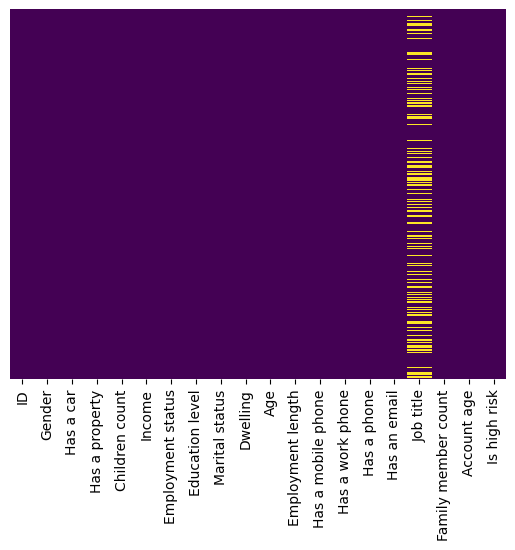

In [ ]:
sns.heatmap(df.isnull(),yticklabels= False, cbar=False, cmap='viridis')      #plotting to see Nan values

In [ ]:
df.columns = df.columns.str.replace(' ', '')           #removing spaces from column names

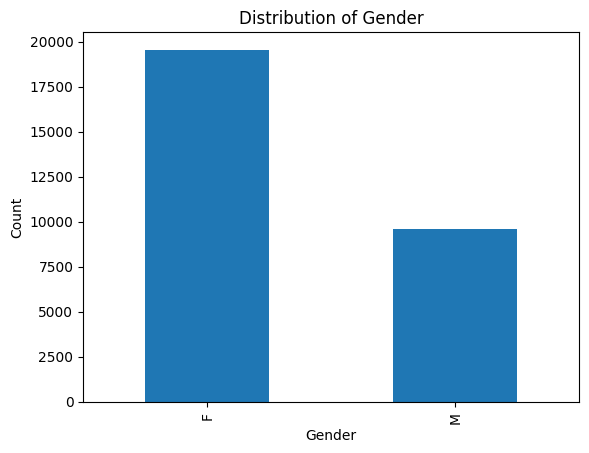

In [ ]:
#Using python to visualise data

df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

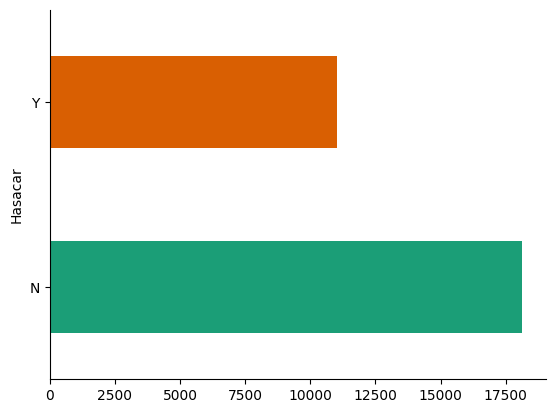

In [ ]:
df.groupby('Hasacar').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

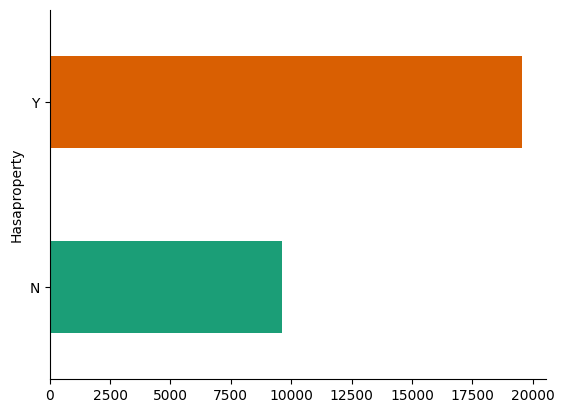

In [ ]:
df.groupby('Hasaproperty').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

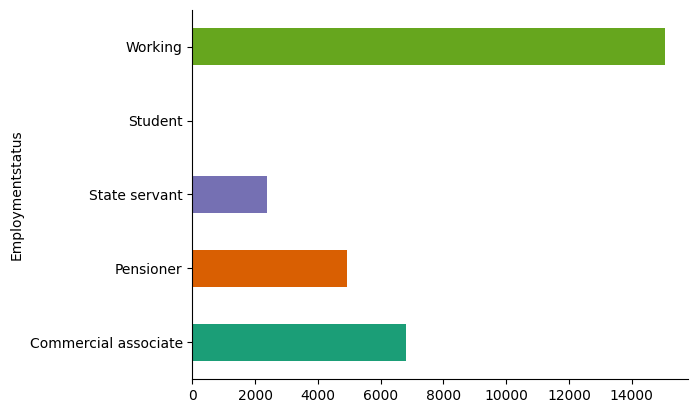

In [ ]:
#Employmentstatus

df.groupby('Employmentstatus').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

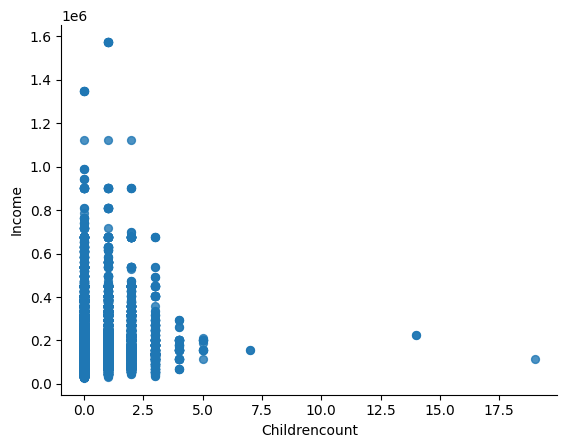

In [ ]:
# Childrencount vs Income
df.plot(kind='scatter', x='Childrencount', y='Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

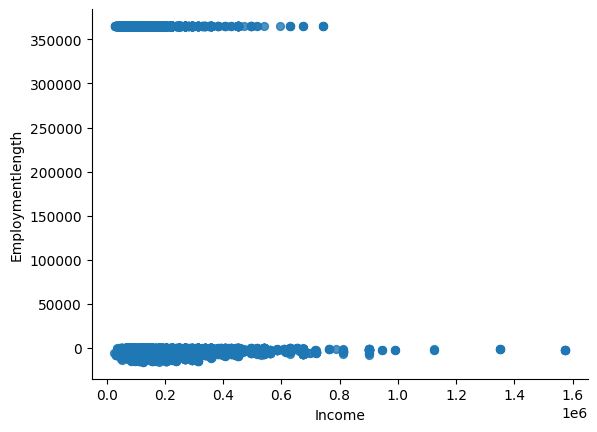

In [ ]:
# Income vs Employmentlength

df.plot(kind='scatter', x='Income', y='Employmentlength', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Feature Engineering and Data Preprocessing (Train Data):

In [ ]:
gender=pd.get_dummies(df['Gender'], drop_first= True)
gender

,M
0,1
1,0
2,0
3,0
4,0
...,...
29160,0
29161,0
29162,0
29163,0


In [ ]:
df.drop(['Gender'],axis=1, inplace= True)
df=pd.concat([df,gender],axis=1)
df = df.rename(columns={'M': 'Gender'})

#Gender column: 1 means Male and 0 means Female

In [ ]:
# Handling categorical variable
prop=pd.get_dummies(df['Hasaproperty'], drop_first= True)
prop

,Y
0,1
1,0
2,1
3,1
4,0
...,...
29160,1
29161,1
29162,1
29163,1


In [ ]:
df=pd.concat([df,prop],axis=1)
df = df.rename(columns={'Y': 'Property'})   # 1 means yes, 0 means no

In [ ]:
car=pd.get_dummies(df['Hasacar'], drop_first= True)
car

,Y
0,1
1,1
2,0
3,1
4,0
...,...
29160,0
29161,0
29162,0
29163,0


In [ ]:
df=pd.concat([df,car],axis=1)
df = df.rename(columns={'Y': 'Car'})   # 1 means yes, 0 means no

In [ ]:
df.drop(['Hasacar','Hasaproperty'],axis=1, inplace= True)

Since, Account Age and Age can't be negative.

In [ ]:
df['Accountage'] = df['Accountage'].abs()
df['Age'] = df['Age'].abs()
df.head(3)

,ID,Childrencount,Income,Employmentstatus,Educationlevel,Maritalstatus,Dwelling,Age,Employmentlength,Hasamobilephone,Hasaworkphone,Hasaphone,Hasanemail,Jobtitle,Familymembercount,Accountage,Ishighrisk,Gender,Property,Car
0,5037048,0,135000.0,Working,Secondary / secondary special,Married,With parents,16271,-3111,1,0,0,0,Core staff,2.0,17.0,0,1,1,1
1,5044630,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,10130,-1651,1,0,0,0,Accountants,2.0,1.0,0,0,0,1
2,5079079,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,12821,-5657,1,0,0,0,Laborers,4.0,38.0,0,0,1,0


Following columns seems to be inappropriate:
1. Employmentlength: The Employmentlength is highly negative.
2. Age : The age is greater than 100.

So, dropping the variables.

In [ ]:
df.drop(['Age','Employmentlength'],axis=1, inplace= True)

<ipython-input-27-ccb8465e0cc2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


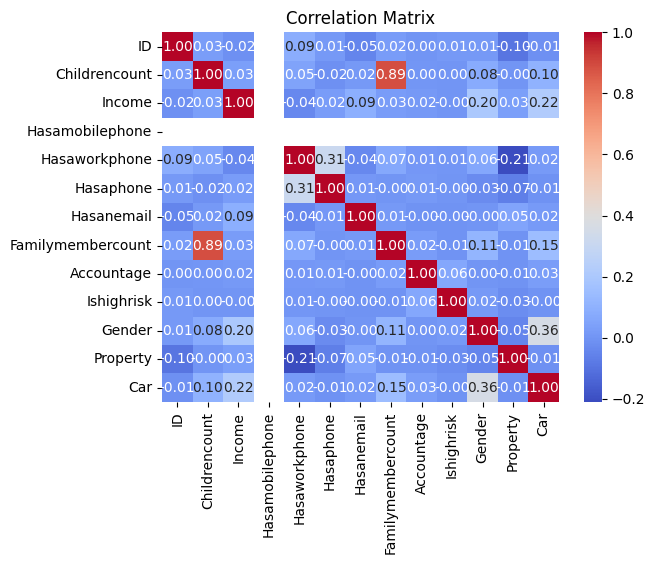

In [ ]:
# Correlation plot

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The above plot shows correlation among the features in the dataframe.
For instance, from the above plot:
1. Family member count and Children count is highly correlated.
2. Has a mobile phone, Has a work phone,Has a phone,Has an email doesn't have any relation with Is high risk. Thus, dropping these features.

In [ ]:
df.drop(['Hasamobilephone', 'Hasaworkphone','Hasaphone','Hasanemail','ID','Maritalstatus','Dwelling','Jobtitle'],axis=1, inplace= True)

In [ ]:
status=pd.get_dummies(df['Employmentstatus'], drop_first= True)
status

,Pensioner,State servant,Student,Working
0,0,0,0,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,1
...,...,...,...,...
29160,1,0,0,0
29161,0,0,0,0
29162,0,0,0,1
29163,1,0,0,0


In [ ]:
df=pd.concat([df,status],axis=1)
df.drop(['Employmentstatus'],axis=1, inplace= True)

In [ ]:
df.drop(['Educationlevel'],axis=1, inplace= True)

In [ ]:
df.head(3)

,Childrencount,Income,Familymembercount,Accountage,Ishighrisk,Gender,Property,Car,Pensioner,State servant,Student,Working
0,0,135000.0,2.0,17.0,0,1,1,1,0,0,0,1
1,1,135000.0,2.0,1.0,0,0,0,1,0,0,0,0
2,2,180000.0,4.0,38.0,0,0,1,0,0,0,0,0


In [ ]:
df.columns

Index(['Childrencount', 'Income', 'Familymembercount', 'Accountage',
       'Ishighrisk', 'Gender', 'Property', 'Car', 'Pensioner', 'State servant',
       'Student', 'Working'],
      dtype='object')

# Feature Engineering (Test Data):
Performing the same feature engineering as the train data.

In [ ]:
df_test=pd.read_csv('/content/test_data.csv', encoding="Latin 1")

In [ ]:
df_test.head(3)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0


In [ ]:
df_test.columns = df_test.columns.str.replace(' ', '')

In [ ]:
sex=pd.get_dummies(df_test['Gender'], drop_first= True)
df_test.drop(['Gender'],axis=1, inplace= True)
df_test=pd.concat([df_test,sex],axis=1)
df_test = df_test.rename(columns={'M': 'Gender'})

In [ ]:
pro=pd.get_dummies(df_test['Hasaproperty'], drop_first= True)
df_test=pd.concat([df_test,pro],axis=1)
df_test = df_test.rename(columns={'Y': 'Property'})

In [ ]:
car_test=pd.get_dummies(df_test['Hasacar'], drop_first= True)
df_test=pd.concat([df_test,car_test],axis=1)
df_test = df_test.rename(columns={'Y': 'Car'})

In [ ]:
df_test.drop(['Hasacar','Hasaproperty'],axis=1, inplace= True)

In [ ]:
df_test['Accountage'] = df_test['Accountage'].abs()

In [ ]:
df_test.drop(['Educationlevel','Age','Employmentlength'],axis=1, inplace= True)
df_test.drop(['ID','Maritalstatus','Dwelling','Jobtitle','Hasamobilephone', 'Hasaworkphone','Hasaphone','Hasanemail'],axis=1, inplace= True)

In [ ]:
stat=pd.get_dummies(df_test['Employmentstatus'], drop_first= True)
df_test=pd.concat([df_test,stat],axis=1)
df_test.drop(['Employmentstatus'],axis=1, inplace= True)

In [ ]:
df_test.head(3)

,Childrencount,Income,Familymembercount,Accountage,Ishighrisk,Gender,Property,Car,Pensioner,State servant,Student,Working
0,0,202500.0,1.0,6.0,0,0,1,0,0,1,0,0
1,0,675000.0,2.0,16.0,0,1,0,1,0,0,0,0
2,0,234000.0,2.0,52.0,0,0,0,0,0,1,0,0


# Machine Learning Model Development:


In [ ]:
X_train=df.drop('Ishighrisk',axis=1)
y_train=df['Ishighrisk']
X_test=df_test.drop('Ishighrisk',axis=1)
y_test=df_test['Ishighrisk']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f'{name}: {accuracy:.4f}')

Logistic Regression: 0.9840
Decision Tree: 0.9705
Random Forest: 0.9801


We can see the best performing model is Logistic Regression.

# Model Evaluation:

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on testing set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 =f1_score(y_test, y_pred, average='weighted')
y_proba = model.predict_proba(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9840
Precision: 0.9682
Recall: 0.9840
F1 Score: 0.9760
Confusion Matrix:
[[7175    0]
 [ 117    0]]


**Conclusion:**

1. The model has achieved high accuracy, precision, recall, and F1 score, indicating overall good performance.

2. In this case, the confusion matrix indicates that:

*   There are 7175 true negatives (predicted negatives correctly).

*   There are 0 false positives (predicted positives incorrectly).

*   There are 117 false negatives (predicted negatives incorrectly).
*   There are 0 true positives (predicted positives correctly).

3.  The predictions made by a model on different samples, the samples are predicted to belong to class 0.

This imbalance in predictions suggests that the model may need further tuning or additional data to better distinguish between the classes and improve its predictive ability, particularly for class 1.




# Predicting Credit Card Approval:

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000

data = {
    'Childrencount': np.random.randint(0, 5, num_samples),
    'Income': np.random.randint(20000, 100000, num_samples),
    'Familymembercount': np.random.randint(1, 6, num_samples),
    'Accountage': np.random.randint(18, 70, num_samples),
    'Gender': np.random.choice([0, 1], num_samples),
    'Property':np.random.choice([0, 1], num_samples),
    'Car': np.random.choice([0, 1], num_samples),
    'Pensioner': np.random.choice([0, 1], num_samples),
    'State servant': np.random.choice([0, 1], num_samples),
    'Student': np.random.choice([0, 1], num_samples),
    'Working': np.random.choice([0, 1], num_samples)
}

# Create DataFrame
df_new= pd.DataFrame(data)

# Display the DataFrame
print(df_new.head())


   Childrencount  Income  Familymembercount  Accountage  Gender  Property  \
0              3   59915                  5          67       1         1   
1              4   57219                  1          23       1         1   
2              2   84644                  2          32       0         0   
3              4   80279                  1          47       1         1   
4              4   73028                  4          59       1         1   

   Car  Pensioner  State servant  Student  Working  
0    0          1              1        0        1  
1    0          0              1        1        0  
2    0          1              1        0        1  
3    1          1              0        0        0  
4    1          1              0        0        1  


In [ ]:
predictions = model.predict(df_new)

# Print predictions
print("Predictions:")
for i, prediction in enumerate(predictions):
    print(f"Sample {i+1}: Predicted class {prediction}")

Predictions:
Sample 1: Predicted class 0
Sample 2: Predicted class 0
Sample 3: Predicted class 0
Sample 4: Predicted class 0
Sample 5: Predicted class 0
Sample 6: Predicted class 0
Sample 7: Predicted class 0
Sample 8: Predicted class 0
Sample 9: Predicted class 0
Sample 10: Predicted class 0
Sample 11: Predicted class 0
Sample 12: Predicted class 0
Sample 13: Predicted class 0
Sample 14: Predicted class 0
Sample 15: Predicted class 0
Sample 16: Predicted class 0
Sample 17: Predicted class 0
Sample 18: Predicted class 0
Sample 19: Predicted class 0
Sample 20: Predicted class 0
Sample 21: Predicted class 0
Sample 22: Predicted class 0
Sample 23: Predicted class 0
Sample 24: Predicted class 0
Sample 25: Predicted class 0
Sample 26: Predicted class 0
Sample 27: Predicted class 0
Sample 28: Predicted class 0
Sample 29: Predicted class 0
Sample 30: Predicted class 0
Sample 31: Predicted class 0
Sample 32: Predicted class 0
Sample 33: Predicted class 0
Sample 34: Predicted class 0
Sample 35:

This output indicates the predictions made by a model on different samples. In this case, all samples are predicted to belong to class 0.